<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%A0%D0%B5%D0%BA%D1%83%D1%80%D1%80%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B5_%D0%B8_%D0%BE%D0%B4%D0%BD%D0%BE%D0%BC%D0%B5%D1%80%D0%BD%D1%8B%D0%B5_%D1%81%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D1%81%D0%BB%D0%BE%D0%B8_%D0%B2_%D1%81%D0%B5%D1%82%D1%8F%D1%85_%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B8_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ООО "Университет Цифровых Технологий платформа 3"

##Применение рекуррентных и одномерных сверточных слоев в сетях обработки текстов.

###Рекурентная сеть. 
Рекуррентные нейронные сети (РНС, англ. Recurrent neural network; RNN) — вид нейронных сетей, где связи между элементами образуют направленную последовательность. Благодаря этому появляется возможность обрабатывать серии событий во времени или последовательные пространственные цепочки.

Изначально рекуррентные нейронные сети предложены для обработки
последовательностей однотипных данных, т.е. порядок
предоставления объектов сети имеет важное значение
- Типовые примеры задач:
 - Автоматический перевод
 - Генерация текста
 - Задачи распознавания речи: обработка последовательности
звуков, обработка текстов естественного языка
 - Автоматическая генерация музыки
 - Задачи компьютерного зрения: обработка
последовательности кадров видео, некоторые задачи
обработки изображений

Рекуррентная сеть аппроксимирует поведение любой
динамической системы.

Джон Хопфилд в 1982 предложил Сеть Хопфилда. В 1993 нейронная система запоминания и сжатия исторических данных смогла решить задачу «очень глубокого обучения», в которой в рекуррентной сети разворачивалось более 1000 последовательных слоёв.

Если сказать упрощенно, слой RNN использует цикл for для итерации по упорядоченной по времени последовательности, храня при этом во внутреннем состоянии, закодированную информацию о шагах, которые он уже видел.


По умолчанию выход слоя RNN содержит один вектор на элемент. Этот вектор является выходом последней ячейки RNN, содержащей информацию обо всей входной последовательности. Размерность этого выхода (batch_size, units), где units соответствует аргументу units передаваемому конструктору слоя.

Слой RNN может также возвращать всю последовательность выходных данных для каждого элемента (по одному вектору на каждый шаг), если вы укажете `return_sequences=True`. Размерность этих выходных данных равна (batch_size, timesteps, units).
Кроме того, слой RNN может вернуть свое конечное внутреннее состояние (состояния).

Возвращенные состояния можно использовать позже для возобновления выполнения RNN или для инициализации другой RNN. Эта настройка обычно используется в модели энкодер-декодер, последовательность к последовательности, где итоговое состояние энкодера используется для начального состояния декодера.

Для того чтобы слой RNN возвращал свое внутреннее состояние, установите параметр `return_state=True` при создании слоя. 

Чтобы настроить начальное состояние слоя, просто вызовите слой с дополнительным аргументом `initial_state`.

Существует несколько видов рекуррентых сетей. Рассмотрим их представление на примере библиотеки Keras. В Keras есть три встроенных слоя RNN:

1. `tf.keras.layers.SimpleRNN`, полносвязная RNN в которой выход предыдущего временного шага должен быть передан в следующий шаг.
2. `tf.keras.layers.GRU`, впервые предложен в статье Изучение представлений фраз с использованием кодера-декодера RNN для статистического машинного перевода. Обратите внимание, что у LSTM 2 тензора состояния, а у GRU только один.
3. `tf.keras.layers.LSTM`, впервые предложен в статье Долгая краткосрочная память

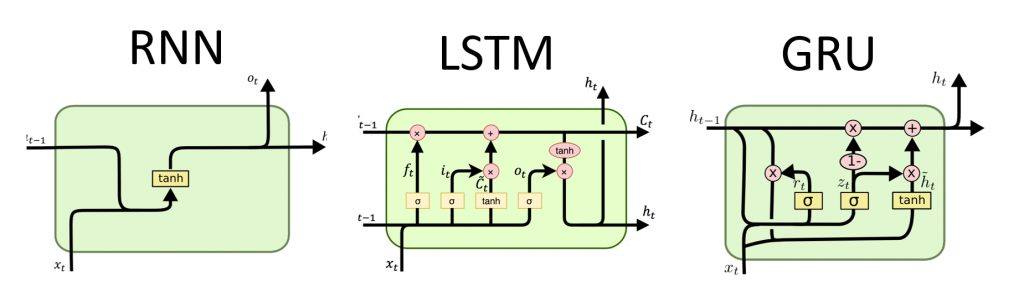

RNN. Самый простой вариант рекуррентной сети, имеет низкие возможности обучения.

На схеме виден принцип работы модели сети:
- x_t — вход на временном шаге t. Например x_1 может быть вектором с одним состоянием  (one-hot vector), соответствующим второму слову предложения.
- h_t — это скрытое состояние на шаге t. Это «память» сети. h_t зависит, как функция, от предыдущих состояний и текущего входа x_t.    h_t=f(Ux_t+Ws_{t-1}). Функция f обычно нелинейная, например tanh или ReLU. h_{-1}, которое требуется для вычисление первого скрытого состояния, обычно инициализируется нулем (нулевым вектором).
- o_t — выход на шаге t. Например, если мы хотим предсказать слово в предложении, выход может быть вектором вероятностей в нашем словаре. o_t = softmax(Vs_t)

GRU.Средняя сложность сети.Имеет средние возможности обучения.

На схеме виден принцип работы модели сети:
- h_t-1, h_t - состояния скрытого нейрона.
- x_t - входной сигнал
- r_t - реализует вентиль сбрасывания. Вентиль сброса работает по аналогии с вентилем забвения в
ячейке долгой кратковременной памяти
- z_t -  вентиль обновления. Вентиль обновления определяет объем информации,
получаемый из прошлого состояния.

LSTM. Самая высокая сложность рекурррентной нейронной сети. Имеет большие возможности обучения. 

На схеме виден принцип работы модели сети:

- Основной составляющей компонентой LSTM-ячейки является
ее состояние 𝐶𝑡, которое передается во времени.
- Ячейка способна добавлять или удалять информацию из
состояния, тщательно регулируемое структурами,
получившими названия ворот (gates)
- Ворота – это способ передачи информации. Они состоят из
сигмоидального слоя и операции поэлементного умножения

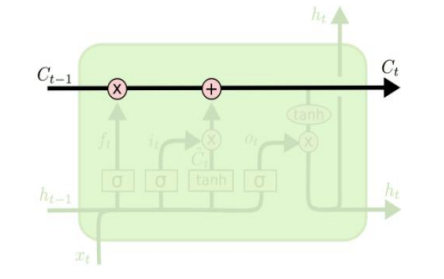

- Этап 1: Принять решение, какие элементы из состояния
необходимо «забыть»
 - Необходимо пройти через слой забвения (forget gate layer) - сигмоидальный слой сети
 - Определяет веса, с которыми пропускаются элементы
состояния
 - Значение 0 означает, что элемент не пропускается, 1 –
элемент пропускается полностью

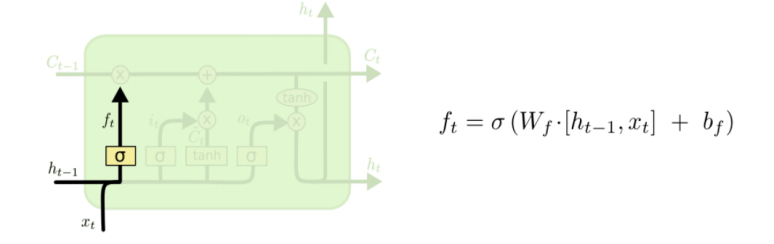

- Этап 2: Определить, какую новую информацию необходимо
сохранить в состоянии ячейки
 - Сигмоидальный слой – слой пропускания входов (inputgate layer) – принимает решение, какие значения необходимо обновить
 - Слой с функцией активацией, соответствующей
гиперболическому тангенсу, формирует вектор новых
кандидатов, которые добавляются к текущему состоянию

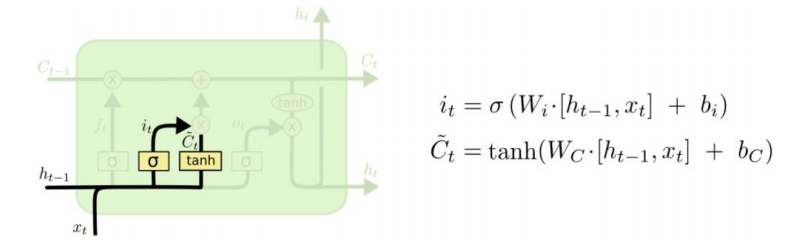

- Этап 3: Обновить состояние ячейки
 - Необходимо из вектора состояния удалить информацию,
для которой принято решение, что ее можно «забыть», и
добавить новую информацию

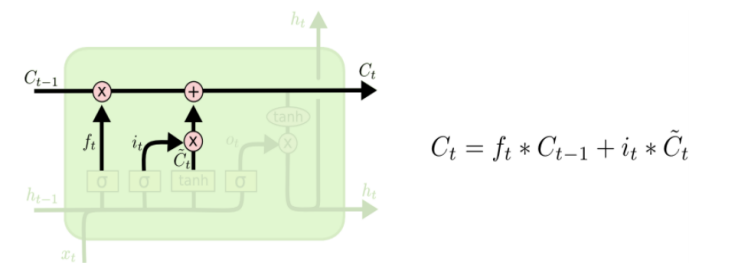

- Этап 4: Принять решение, что выдать в качестве выхода ячейки
 - Выход строится на основании состояния ячейки и
представляет собой его фильтрованную версию
 - Принимается решение, какие части состояния необходимо
вывести, посредством введения сигмоидального слоя
 - Далее элементы состояния ячейки нормируются в отрезок
−1, 1 с использованием функции гиперболического
тангенса и умножаются на выход сигмоидального слоя

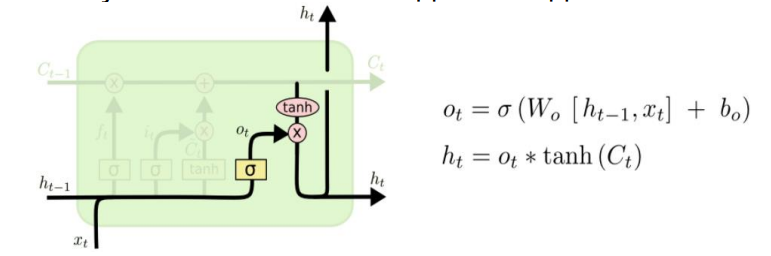

Двунаправленные RNN (BRNN)


Для последовательностей отличных от временных рядов (напр. текстов), часто бывает так, что модель RNN работает лучше, если она обрабатывает последовательность не только от начала до конца, но и наоборот. Например, чтобы предсказать следующее слово в предложении, часто полезно знать контекст вокруг слова, а не только слова идущие перед ним.



BRNN могут быть обучены с использованием алгоритмов, аналогичных RNN, потому что два направленных нейрона не взаимодействуют друг с другом. Однако, когда применяется обратное распространение во времени, требуются дополнительные процессы, потому что обновление входных и выходных слоев невозможно выполнить одновременно. Общие процедуры обучения следующие: для прямого прохода сначала передаются прямые и обратные состояния, затем передаются выходные нейроны. Для обратного прохода сначала передаются выходные нейроны, затем передаются прямые и обратные состояния. После выполнения прямого и обратного проходов веса обновляются. 

Keras предоставляет простой API для создания таких двунаправленных сетей RNN: обертку `tf.keras.layers.Bidirectional`.

In [ ]:
model = Sequential()

model.add(Bidirectional(LSTM(64, return_sequences=True), 
                               input_shape=(5, 10)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 5, 128)            38400     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 10)                650       
Total params: 80,266
Trainable params: 80,266
Non-trainable params: 0
_________________________________________________________________


Под капотом, `Bidirectional` скопирует переданный слой RNN layer, и перевернет поле `go_backwards` вновь скопированного слоя, и таким образом входные данные будут обработаны в обратном порядке.

На выходе `Bidirectional RNN` по умолчанию будет сумма вывода прямого слоя и вывода обратного слоя. Если вам нужно другое поведение слияния, напр. конкатенация, поменяйте параметр `merge_mode` в конструкторе обертки `Bidirectional`.

###Одномерные сверточные сети.

Сверточная нейронная сеть (Convolutional Neural Network — ConvNet/CNN) — это Deep Learning-алгоритм, который может принимать входное изображение, последовательность присваивать важность (усваиваемые веса и смещения) различным областям/объектам в изображении, последовательности и может отличать одно от другого.

Особенности одномерной сверточной нейронной сети
- Время обучения значительно ниже, чем у рекуррентных нейронных сетей.
- Нет возможности «запомнить» нужные данные на длительный срок, этот недостаток можно устранить с помощью механизма «внимания» текущее состояние.
- Одномерные сверточные нейронные сети постепенно вытесняют рекуррентные для задач анализа текстов.

Сверточные нейронные сети хороши там, где нужно увидеть кусочек или всю последовательность целиком и сделать какой-то вывод из этого. То есть это задачи, например, детекции спама, анализа тональности или извлечения именованных сущностей. 

Принцип работы одномерной свертки выглядит следующим образом:


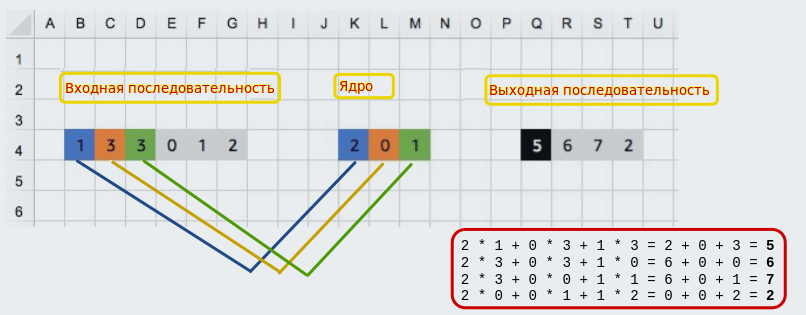

Где есть Входная последовательность, Ядро свертки и Выходная последовательность, получившаяся от суммы при последовательном умножении элементов ядра сверки на элементы части входной последовательности. Часть входной последовательности формируется в результате проэцирования окна, размером с ядро свертки, с определенным шагом. В этом примере шаг задан равным 1.   

Приннцип применение сверточной сети к текстам отражен на следующей схеме:

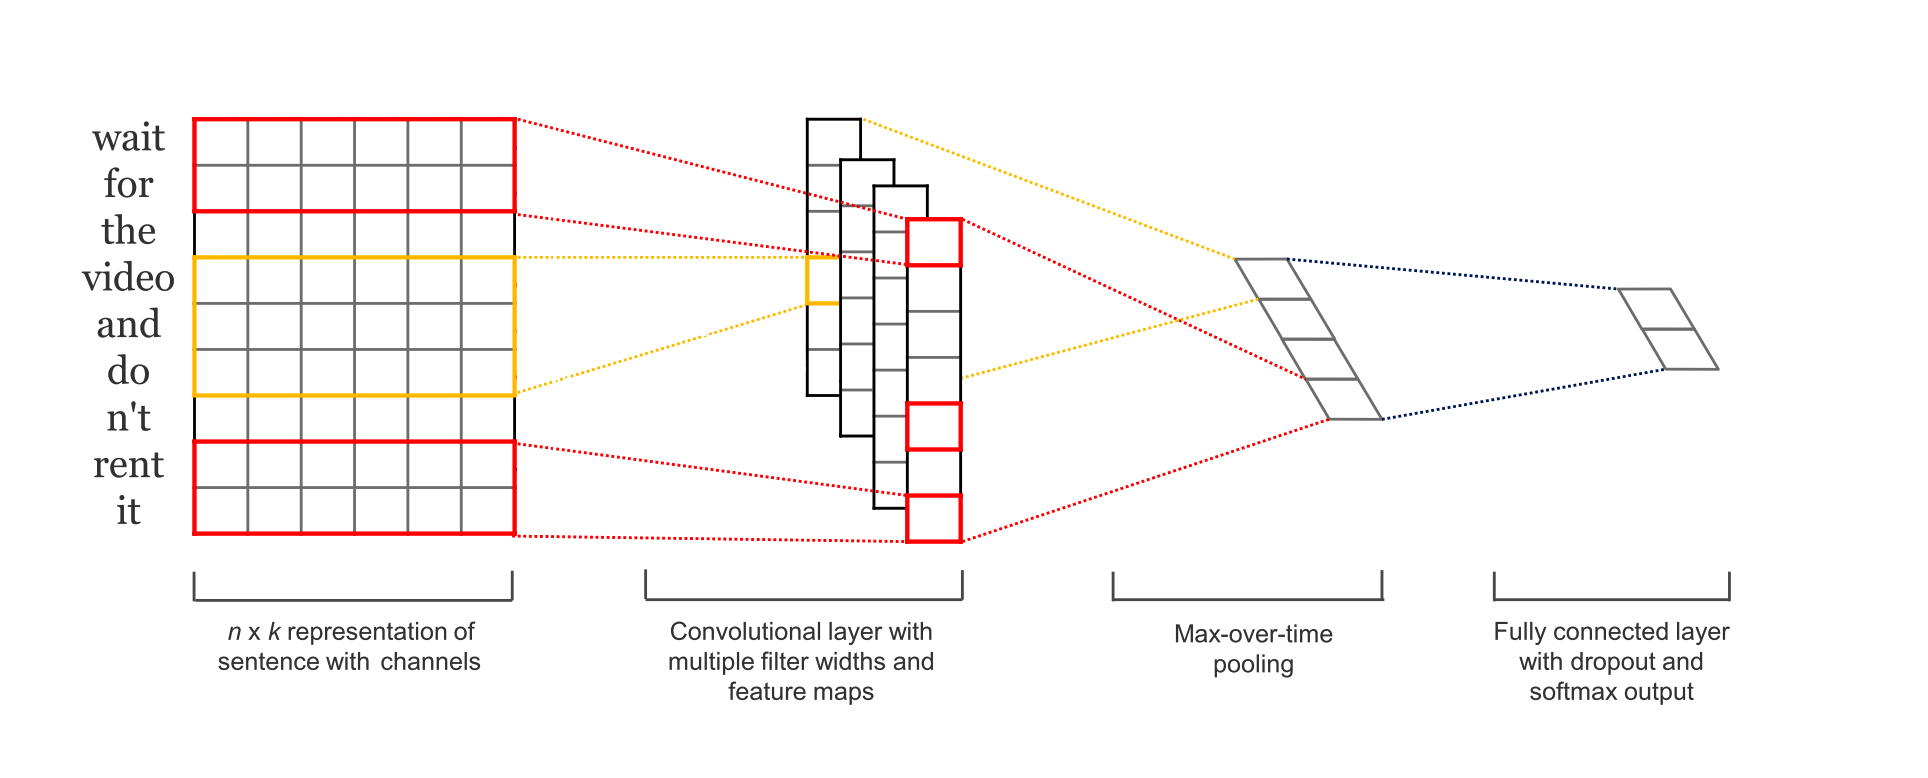

##Рассмотрим задачу классификации тональности текста.
И сравним решение с различными моделяни нейронных сетей.

###Инициализация необходимых библиотек.

In [ ]:
import numpy as np # модуль для загрузки файлов в colab
import pandas as pd #библиотека для работы с таблицами pandas
from google.colab import files #библиотека для работы с массивами данных
import json

from sklearn.model_selection import train_test_split
import tensorflow as tf # импортируем tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer,tokenizer_from_json
from tensorflow.keras.utils import plot_model, get_file, to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential,load_model
# Загружаем стандартные слои нейросети(полносвязный, регуляризации, нормализации, векторного представления слов, выравнивания, активации)
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Embedding, Flatten, Activation
# Загружаем сверточные слои
from tensorflow.keras.layers import Conv1D, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D
# Загружаем рекуррентные слои
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
import csv # импортируем модуль для удобной работы с файлами
import matplotlib as mpl
import matplotlib.pyplot as plt #Отрисовка изображений
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

###Загрузка и знакомство с данными

In [ ]:
def Load_data_from_udt3(max_word): # загружаем данные и формируем списки вопросов и ответов
    file_name = get_file(origin='http://dataudt.ru/datasets/reviews_mobile_phone_train.csv', fname='reviews_mobile_phone_train.csv')
    traintext = []
    trainlabel = []
    with open(file_name, encoding='utf-8', newline='') as file:
        file_reader = csv.reader(file, delimiter=',')  
        for row in file_reader:
            # формируем данные текст, вторая метка
            text_ = row[0]
            label_ = row[1]
            # проверяем не превышает ли вопрос или ответ максимальное количество слов, если нет то заносим в базу эти данные
            if (len(text_.split()) <= max_word) and (label_ in '12345'): 
                # Добавим запись текст и метки в соотвествующие списки
                traintext.append(text_) 
                trainlabel.append(int(label_))   
    print('Данные для обучения сформированы!') 
    return  traintext, trainlabel

In [ ]:
# загрузим данные и выведем несколько строк
trainX, trainY = Load_data_from_udt3(100)

Данные для обучения сформированы!


In [ ]:
#зададим описательную часть тональности
ton = {
    1:'крайне негативная',
    2:'негативная',
    3:'посредственная',
    4:'положительная',
    5:'восхитительная'
    }

In [ ]:
# выведем несколько строк, проверим данные
for i in range(1,10):
    print(f'текст: {trainX[i]} \n в тональности: {trainY[i]} - {ton[trainY[i]]} ') #

текст: Крупный экран, кнопки клавиатуры и цифры на экране - брали как "дедушкафон" только для звонков. Низкая цена, хороший габарит - в крупную мужскую руку. Аккумулятор "сдох" через 9 месяцев и запасной негде купить.Такой марки нет в продаже.  В салонах связи посоветовали купить новый ТЕЛЕФОН.Пришлось выбросить СВОЙ телефон.  Ожидания были самые радужные - по внешним параметрам (см. выше) ОЧЕНЬ подошел.  Жаль, что не удалось попользоваться. 
 в тональности: 2 - негативная 
текст: Телефон за такую цену просто подарок! Я покупал его 10.10.2015.  Не приобретал на него ни защ. стекла, ни чехла, работает как часы. Спустя 3 года начала быстро лететь батарейка, также слабая камера у телефона. Читал что у других людей спустя год начинает лететь батарейка, а у меня все отлично было) Всем советую. Телефон был у меня белого цвета. На 8 ГБ  и версия андроида 4.4. Стоил своих денег  в своё время. Всем советую. 
 в тональности: 5 - восхитительная 
текст: +Фонарь;+Неплохая камера; -Аккумулятор слабы

Делим на обучающую и тестовую выборки.

In [ ]:
trainX, testX, trainY, testY = train_test_split(trainX, trainY, test_size=0.15, shuffle=True)

In [ ]:
print(len(trainX))
print(len(trainY))
print(len(testX))
print(len(testY))

27953
27953
4933
4933


###Обработка данных.

Создадим токенайзер, для перевода текстовой последовательности в цифровую, поскольку алгоритмы глубокого обучения и машинного обучения работают с числами. Дополнительно зададим возможность сохранения токенайзера в файл на своем диске и возможность загрузки токенайзера обученного на этих данных и ранее сохраненного на сервере университета.

In [ ]:
# Подключаем керасовский токенизатор и собираем словарь индексов
def Create_and_save_tokenizer(trainX, trainX1, # база отзывов
                              maxWordsCount = None, # Определяем максимальное количество слов/индексов, учитываемое при обучении текстов
                              load_flag = False,    # необходимость загрузить готовый токенайзер ранее обученный на этих данных
                              save_flag = False,    # необходимость записи в файл
                              file_name_tokin = 'tokenizer_for_tonality_analysis.json' # файл в который будет сохранен токенайзер
                              ):
    if load_flag:
        tok_path = tf.keras.utils.get_file(origin='http://dataudt.ru/datasets/tokenizer_for_kaleydoskop.json', fname='tokenizer_for_kaleydoskop.json')
        with open(tok_path) as f:
            data = json.load(f)
            tokenizer = tokenizer_from_json(data)
    else:
        tokenizer = Tokenizer(num_words=maxWordsCount, # максимальное количество слов, которые будет учитывать наш токенайзер
                            lower=True, # приводятся ли все символы к нижнему регситру
                            split=' ', # символ, по которому происходит разделение на слова (токены)
                            oov_token='unknown', # токен для неизвестных слов 
                            char_level=False, # являются ли токенами отдельные буквы
                            filters='"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff' # символы, которые он токенайзер будет фильтровать
                            )
        tokenizer.fit_on_texts(trainX + trainX1) # загружаем в токенизатор список отзывов для сборки словаря частотности
    vocabularyItems = list(tokenizer.word_index.items()) # список с cодержимым словаря
    vocabularySize = len(vocabularyItems)+1 # размер словаря
    print(f'Фрагмент словаря : {vocabularyItems[:50]}')
    print(f'Размер словаря : {vocabularySize}')
    if save_flag:
        tokenizer_json = tokenizer.to_json()
        with open(file_name_tokin, 'w', encoding='utf-8') as f:
            f.write(json.dumps(tokenizer_json, ensure_ascii=False))
            print(f'Токинайзер для бота записан в : {file_name_tokin}')
    return tokenizer, vocabularySize

In [ ]:
# настройте путь для сохранения токенайзера на своем гугл-диске и задайте save_flag = True
# если задать load_flag = True, то можно загрузить токенайзер ранее обученный на этих данных, с сервера университета
file_name_tokin = '/content/drive/My Drive/datasets/LSTM_Conv1D/tokenizer_for_tonality_analysis.json'
tokenizer, vocabularySize = Create_and_save_tokenizer(trainX,testX,
                                                      maxWordsCount = 10000, 
                                                      save_flag = True,
                                                      file_name_tokin = file_name_tokin)

Фрагмент словаря : [('unknown', 1), ('не', 2), ('и', 3), ('в', 4), ('на', 5), ('с', 6), ('телефон', 7), ('очень', 8), ('что', 9), ('но', 10), ('за', 11), ('экран', 12), ('для', 13), ('камера', 14), ('все', 15), ('как', 16), ('по', 17), ('нет', 18), ('это', 19), ('при', 20), ('2', 21), ('то', 22), ('а', 23), ('у', 24), ('я', 25), ('работает', 26), ('цена', 27), ('батарея', 28), ('так', 29), ('если', 30), ('только', 31), ('он', 32), ('5', 33), ('хороший', 34), ('из', 35), ('1', 36), ('меня', 37), ('3', 38), ('его', 39), ('качество', 40), ('через', 41), ('без', 42), ('есть', 43), ('звук', 44), ('можно', 45), ('памяти', 46), ('после', 47), ('4', 48), ('к', 49), ('просто', 50)]
Размер словаря : 85660
Токинайзер для бота записан в : /content/drive/My Drive/datasets/LSTM_Conv1D/tokenizer_for_tonality_analysis.json


In [ ]:
# метод для токенизации данных
def Tokenized_data(data_token, tokenizer, maxLen): 
    # Устанавливаем закодированные входные данные
    tokenizedDatas = tokenizer.texts_to_sequences(data_token) # разбиваем текст вопросов на последовательности индексов
    maxLenData = max([ len(x) for x in tokenizedDatas]) # уточняем длину самого большого элемента последовательности
    # Делаем последовательности одной длины, заполняя нулями более короткие вопросы
    if maxLen > maxLenData: maxLenData = maxLen
    paddedDatas = pad_sequences(tokenizedDatas, maxlen=maxLenData, padding='post')
    # Предподготавливаем данные для входа в сеть
    dataForInput = np.array(paddedDatas) # переводим в numpy массив
    return dataForInput, maxLenData

In [ ]:
# метод для переводa в one hot encoding 
def Updata_to_OHE(dataY): 
    oneHotdataY = to_categorical(dataY,6) # переводим в one hot vector
    oneHotdataY = np.array(oneHotdataY) # и сохраняем в виде массива numpy
    return oneHotdataY

Подготовим данные для подачи в нейронную сеть

In [ ]:
# Подготовим данные для обучающей выборки
trainX_ForInput, maxLenData = Tokenized_data(trainX, tokenizer, 0)
trainY_OHE = Updata_to_OHE(trainY)
# Подготовим данные для тестовой выборки
testX_ForInput, max_test_LenData = Tokenized_data(testX, tokenizer, maxLenData)

In [ ]:
trainY_OHE = Updata_to_OHE(trainY)

###Создадим модели нейронной сети.

In [ ]:
def Plot_train_history(history, title):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(accuracy))

    plt.figure()

    plt.plot(epochs, accuracy, 'b', label='Доля верных ответов на обучающем наборе')
    plt.plot(epochs, val_accuracy, 'r', label='Доля верных ответов на проверочном наборе')
    plt.title(title)
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля верных ответов')
    plt.legend()

    plt.show()

In [ ]:
# Собираем статистический результат предикта
def Show_predict_model(Model_test, testX_ForInput, testY):
    Output_FortestX = np.argmax(Model_test.predict(testX_ForInput),axis=-1)
    count_True = [0,0,0,0,0,0]
    count_Class = [0,0,0,0,0,0]
    for i,item in enumerate(testY):
        if item == Output_FortestX[i]:
            count_True[item] += 1
        count_Class[item] += 1
    print(f'Средний процент распознавания  {sum(count_True)/sum(count_Class) * 100} %')
    for i in range(1,6):
        print(f'По классу {ton[i]}: средний процент распознавания {count_True[i]/count_Class[i] * 100} %')



SimpleRNN

In [ ]:
def Create_SimpleRNN_Model(embeding_size, maxLenData, maxWordsCount = 10000):
    modelEL = Sequential() # создаём последовательную модель нейросети

    # преобразовываем каждое слово в многомерный вектор c указанием размерности вектора и длины входных данных
    modelEL.add(Embedding(maxWordsCount, embeding_size, input_length=maxLenData ))

    modelEL.add(SpatialDropout1D(0.2)) # добавляем слой регуляризации, "выключая" 1D карты объектов из эмбединг векторов, во избежание переобучения
    modelEL.add(BatchNormalization()) # добавляем слой нормализации данных
    modelEL.add(SimpleRNN(4, dropout=0.2, recurrent_dropout=0.2, activation="relu"))
    modelEL.add(Dense(6, activation='softmax')) # добавляем полносвязный слой на 6 нейронов, с функцией активации softmax на выходном слое

    # Компиляция, составление модели с выбором алгоритма оптимизации, функции потерь и метрики точности
    modelEL.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
    return modelEL


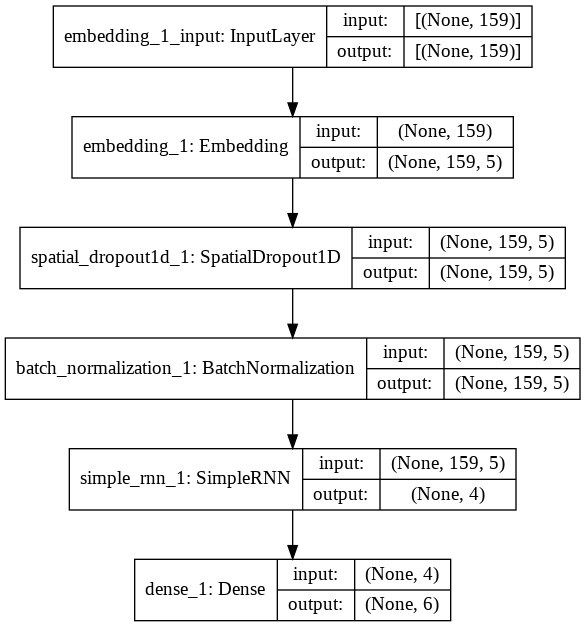

In [ ]:
# Создадим экземпляр модели нейронной сети
SimpleRNN_Model = Create_SimpleRNN_Model(5, maxLenData)
# и построим график для визуализации слоев и связей между ними
plot_model(SimpleRNN_Model, to_file='SimpleRNN_Model.png', show_shapes=True) 

In [ ]:
# Обучаем сеть с указанием обучающей выборки, количества эпох, размера минибатча для подачи сети, и размера валидационной выборки
history_SimpleRNN_Model = SimpleRNN_Model.fit(trainX_ForInput, trainY_OHE, epochs=100, batch_size=160, validation_split=0.2)

Epoch 1/100
140/140 [==============================] - 26s 184ms/step - loss: 1.3825 - accuracy: 0.4796 - val_loss: 1.3692 - val_accuracy: 0.4881
Epoch 2/100
140/140 [==============================] - 26s 182ms/step - loss: 1.3819 - accuracy: 0.4796 - val_loss: 1.3696 - val_accuracy: 0.4881
Epoch 3/100
140/140 [==============================] - 25s 182ms/step - loss: 1.3818 - accuracy: 0.4796 - val_loss: 1.3700 - val_accuracy: 0.4881
Epoch 4/100
140/140 [==============================] - 26s 183ms/step - loss: 1.3816 - accuracy: 0.4796 - val_loss: 1.3695 - val_accuracy: 0.4881
Epoch 5/100
140/140 [==============================] - 26s 183ms/step - loss: 1.3818 - accuracy: 0.4796 - val_loss: 1.3696 - val_accuracy: 0.4881
Epoch 6/100
140/140 [==============================] - 26s 183ms/step - loss: 1.3818 - accuracy: 0.4796 - val_loss: 1.3716 - val_accuracy: 0.4881
Epoch 7/100
140/140 [==============================] - 26s 183ms/step - loss: 1.3818 - accuracy: 0.4796 - val_loss: 1.3697 -

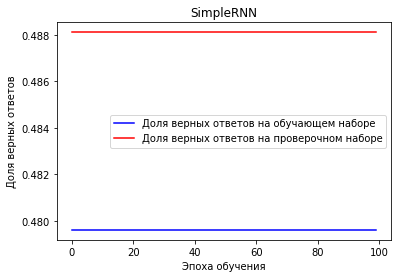

In [ ]:
Plot_train_history(history_SimpleRNN_Model, 'SimpleRNN')

In [ ]:
Show_predict_model(SimpleRNN_Model, testX_ForInput, testY)

Средний процент распознавания  46.96938982363673 %
По классу крайне негативная: средний процент распознавания 0.0 %
По классу негативная: средний процент распознавания 0.0 %
По классу посредственная: средний процент распознавания 0.0 %
По классу положительная: средний процент распознавания 0.0 %
По классу восхитительная: средний процент распознавания 100.0 %


In [ ]:
# Обучаем сеть с указанием обучающей выборки, количества эпох, размера минибатча для подачи сети, и размера валидационной выборки
history_SimpleRNN_Model = SimpleRNN_Model.fit(trainX_ForInput, trainY_OHE, epochs=150, batch_size=260, validation_split=0.2)

Epoch 1/150
87/87 [==============================] - 15s 175ms/step - loss: 1.3820 - accuracy: 0.4796 - val_loss: 1.3704 - val_accuracy: 0.4881
Epoch 2/150
87/87 [==============================] - 15s 175ms/step - loss: 1.3820 - accuracy: 0.4796 - val_loss: 1.3691 - val_accuracy: 0.4881
Epoch 3/150
87/87 [==============================] - 15s 177ms/step - loss: 1.3816 - accuracy: 0.4796 - val_loss: 1.3692 - val_accuracy: 0.4881
Epoch 4/150
87/87 [==============================] - 15s 173ms/step - loss: 1.3821 - accuracy: 0.4796 - val_loss: 1.3723 - val_accuracy: 0.4881
Epoch 5/150
87/87 [==============================] - 15s 178ms/step - loss: 1.3816 - accuracy: 0.4796 - val_loss: 1.3704 - val_accuracy: 0.4881
Epoch 6/150
87/87 [==============================] - 15s 174ms/step - loss: 1.3817 - accuracy: 0.4796 - val_loss: 1.3695 - val_accuracy: 0.4881
Epoch 7/150
87/87 [==============================] - 16s 179ms/step - loss: 1.3823 - accuracy: 0.4796 - val_loss: 1.3725 - val_accuracy:

In [ ]:
Show_predict_model(SimpleRNN_Model, testX_ForInput, testY)

Средний процент распознавания  46.96938982363673 %
По классу крайне негативная: средний процент распознавания 0.0 %
По классу негативная: средний процент распознавания 0.0 %
По классу посредственная: средний процент распознавания 0.0 %
По классу положительная: средний процент распознавания 0.0 %
По классу восхитительная: средний процент распознавания 100.0 %


In [ ]:
SimpleRNN_Model.save('/content/drive/My Drive/datasets/LSTM_Conv1D/SimpleRNN_Model.h5') # сохраним модель по необходимости
# SimpleRNN_Model = load_model('/content/drive/My Drive/datasets/LSTM_Conv1D/SimpleRNN_Model.h5') # загрузим модель по необходимости

GRU

In [ ]:
def Create_GRU_Model(embeding_size, maxLenData, maxWordsCount = 10000):
    modelEL = Sequential() # создаём последовательную модель нейросети

    # преобразовываем каждое слово в многомерный вектор c указанием размерности вектора и длины входных данных
    modelEL.add(Embedding(maxWordsCount, embeding_size, input_length=maxLenData ))

    modelEL.add(SpatialDropout1D(0.2)) # добавляем слой регуляризации, "выключая" 1D карты объектов из эмбединг векторов, во избежание переобучения
    modelEL.add(BatchNormalization()) # добавляем слой нормализации данных
    modelEL.add(GRU(4, dropout=0.2, recurrent_dropout=0.2, activation="relu"))
    modelEL.add(Dense(6, activation='softmax')) # добавляем полносвязный слой на 6 нейронов, с функцией активации softmax на выходном слое

    # Компиляция, составление модели с выбором алгоритма оптимизации, функции потерь и метрики точности
    modelEL.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
    return modelEL

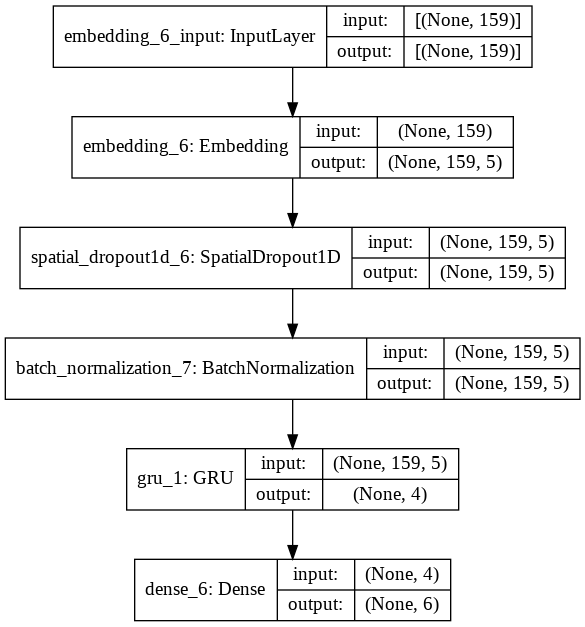

In [ ]:
# Создадим экземпляр модели нейронной сети
GRU_Model = Create_GRU_Model(5, maxLenData)
# и построим график для визуализации слоев и связей между ними
plot_model(GRU_Model, to_file='GRU_Model.png', show_shapes=True) 

In [ ]:
# Обучаем сеть с указанием обучающей выборки, количества эпох, размера минибатча для подачи сети, и размера валидационной выборки
history_GRU_Model = GRU_Model.fit(trainX_ForInput, trainY_OHE, epochs=100, batch_size=200, validation_split=0.2)

Epoch 1/100
112/112 [==============================] - 56s 472ms/step - loss: 1.7030 - accuracy: 0.2076 - val_loss: 1.6705 - val_accuracy: 0.4881
Epoch 2/100
112/112 [==============================] - 52s 465ms/step - loss: 1.5168 - accuracy: 0.4402 - val_loss: 1.5305 - val_accuracy: 0.4881
Epoch 3/100
112/112 [==============================] - 52s 463ms/step - loss: 1.4294 - accuracy: 0.4796 - val_loss: 1.4583 - val_accuracy: 0.4881
Epoch 4/100
112/112 [==============================] - 52s 468ms/step - loss: 1.4017 - accuracy: 0.4796 - val_loss: 1.4035 - val_accuracy: 0.4881
Epoch 5/100
112/112 [==============================] - 52s 465ms/step - loss: 1.3903 - accuracy: 0.4796 - val_loss: 1.3783 - val_accuracy: 0.4881
Epoch 6/100
112/112 [==============================] - 52s 466ms/step - loss: 1.3858 - accuracy: 0.4796 - val_loss: 1.3737 - val_accuracy: 0.4881
Epoch 7/100
112/112 [==============================] - 52s 467ms/step - loss: 1.3853 - accuracy: 0.4796 - val_loss: 1.3709 -

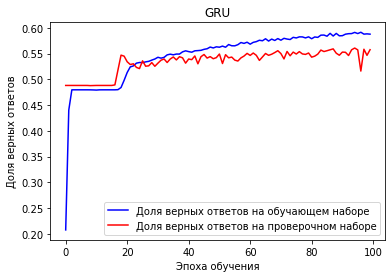

In [ ]:
Plot_train_history(history_GRU_Model, 'GRU')

In [ ]:
# Обучаем сеть с указанием обучающей выборки, количества эпох, размера минибатча для подачи сети, и размера валидационной выборки
history_GRU_Model = GRU_Model.fit(trainX_ForInput, trainY_OHE, epochs=100, batch_size=200, validation_split=0.2)

Epoch 1/100
112/112 [==============================] - 54s 481ms/step - loss: 0.9470 - accuracy: 0.5904 - val_loss: 1.0856 - val_accuracy: 0.5470
Epoch 2/100
112/112 [==============================] - 54s 482ms/step - loss: 0.9449 - accuracy: 0.5921 - val_loss: 1.0808 - val_accuracy: 0.5516
Epoch 3/100
112/112 [==============================] - 54s 480ms/step - loss: 0.9419 - accuracy: 0.5914 - val_loss: 1.0860 - val_accuracy: 0.5503
Epoch 4/100
112/112 [==============================] - 53s 477ms/step - loss: 0.9451 - accuracy: 0.5896 - val_loss: 1.0775 - val_accuracy: 0.5495
Epoch 5/100
112/112 [==============================] - 54s 480ms/step - loss: 0.9413 - accuracy: 0.5903 - val_loss: 1.0879 - val_accuracy: 0.5425
Epoch 6/100
112/112 [==============================] - 54s 481ms/step - loss: 0.9369 - accuracy: 0.5948 - val_loss: 1.0814 - val_accuracy: 0.5516
Epoch 7/100
112/112 [==============================] - 54s 481ms/step - loss: 0.9370 - accuracy: 0.5934 - val_loss: 1.0856 -

In [ ]:
Show_predict_model(GRU_Model, testX_ForInput, testY)

Средний процент распознавания  55.402392053517126 %
По классу крайне негативная: средний процент распознавания 70.817843866171 %
По классу негативная: средний процент распознавания 1.1574074074074074 %
По классу посредственная: средний процент распознавания 24.440619621342513 %
По классу положительная: средний процент распознавания 23.661971830985916 %
По классу восхитительная: средний процент распознавания 84.29003021148036 %


In [ ]:
GRU_Model.save('/content/drive/My Drive/datasets/LSTM_Conv1D/GRU_Model.h5') # сохраним модель по необходимости
# GRU_Model = load_model('/content/drive/My Drive/datasets/LSTM_Conv1D/GRU_Model.h5') # загрузим модель по необходимости

LSTM

In [ ]:
def Create_LSTM_Model(embeding_size, maxLenData, maxWordsCount = 10000):
    modelEL = Sequential() # создаём последовательную модель нейросети

    # преобразовываем каждое слово в многомерный вектор c указанием размерности вектора и длины входных данных
    modelEL.add(Embedding(maxWordsCount, embeding_size, input_length=maxLenData ))

    modelEL.add(SpatialDropout1D(0.2)) # добавляем слой регуляризации, "выключая" 1D карты объектов из эмбединг векторов, во избежание переобучения
    modelEL.add(BatchNormalization()) # добавляем слой нормализации данных
    modelEL.add(LSTM(4))
    modelEL.add(Dense(6, activation='softmax')) # добавляем полносвязный слой на 6 нейронов, с функцией активации softmax на выходном слое

    # Компиляция, составление модели с выбором алгоритма оптимизации, функции потерь и метрики точности
    modelEL.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
    return modelEL

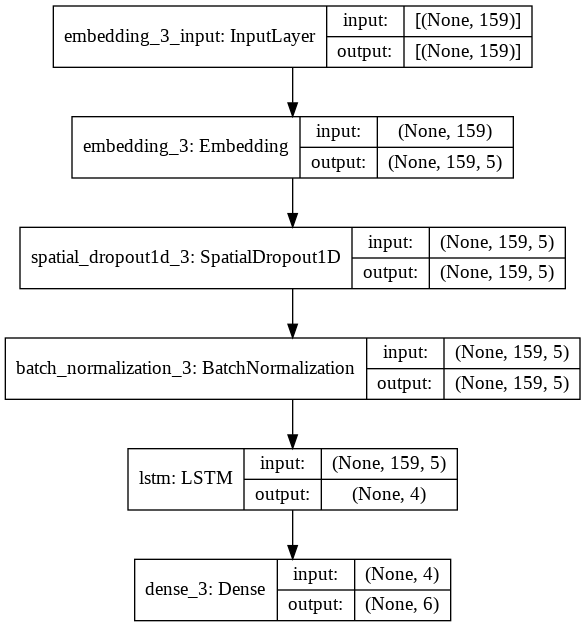

In [ ]:
# Создадим экземпляр модели нейронной сети
LSTM_Model = Create_LSTM_Model(5, maxLenData)
# и построим график для визуализации слоев и связей между ними
plot_model(LSTM_Model, to_file='LSTM_Model.png', show_shapes=True) 

In [ ]:
# Обучаем сеть с указанием обучающей выборки, количества эпох, размера минибатча для подачи сети, и размера валидационной выборки
history_LSTM_Model = LSTM_Model.fit(trainX_ForInput, trainY_OHE, epochs=1000, batch_size=160, validation_split=0.2)

Epoch 1/1000
140/140 [==============================] - 2s 12ms/step - loss: 1.2374 - accuracy: 0.5344 - val_loss: 1.2808 - val_accuracy: 0.5287
Epoch 2/1000
140/140 [==============================] - 2s 11ms/step - loss: 1.2369 - accuracy: 0.5362 - val_loss: 1.2861 - val_accuracy: 0.5266
Epoch 3/1000
140/140 [==============================] - 2s 11ms/step - loss: 1.2350 - accuracy: 0.5367 - val_loss: 1.2704 - val_accuracy: 0.5321
Epoch 4/1000
140/140 [==============================] - 2s 11ms/step - loss: 1.2330 - accuracy: 0.5369 - val_loss: 1.2727 - val_accuracy: 0.5312
Epoch 5/1000
140/140 [==============================] - 2s 11ms/step - loss: 1.2381 - accuracy: 0.5359 - val_loss: 1.2908 - val_accuracy: 0.5253
Epoch 6/1000
140/140 [==============================] - 2s 11ms/step - loss: 1.2371 - accuracy: 0.5381 - val_loss: 1.2813 - val_accuracy: 0.5294
Epoch 7/1000
140/140 [==============================] - 2s 11ms/step - loss: 1.2375 - accuracy: 0.5364 - val_loss: 1.2670 - val_ac

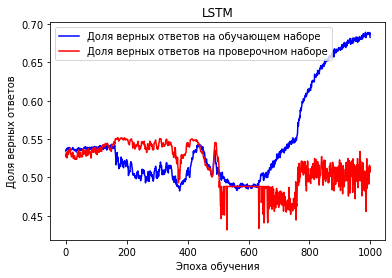

In [ ]:
Plot_train_history(history_LSTM_Model, 'LSTM')

In [ ]:
LSTM_Model.save('/content/drive/My Drive/datasets/LSTM_Conv1D/LSTM_Model.h5') # сохраним модель по необходимости
# LSTM_Model = load_model('/content/drive/My Drive/datasets/LSTM_Conv1D/LSTM_Model.h5') # загрузим модель по необходимости

In [ ]:
Show_predict_model(LSTM_Model, testX_ForInput, testY)

Средний процент распознавания  52.68599229677681 %
По классу крайне негативная: средний процент распознавания 60.966542750929364 %
По классу негативная: средний процент распознавания 1.8518518518518516 %
По классу посредственная: средний процент распознавания 31.497418244406195 %
По классу положительная: средний процент распознавания 44.413145539906104 %
По классу восхитительная: средний процент распознавания 69.35692706085456 %


Bidirectional

In [ ]:
def Create_Bidirectional_Model(embeding_size, maxLenData, maxWordsCount = 10000):
    modelEL = Sequential() # создаём последовательную модель нейросети

    # преобразовываем каждое слово в многомерный вектор c указанием размерности вектора и длины входных данных
    modelEL.add(Embedding(maxWordsCount, embeding_size, input_length=maxLenData ))

    modelEL.add(SpatialDropout1D(0.2)) # добавляем слой регуляризации, "выключая" 1D карты объектов из эмбединг векторов, во избежание переобучения
    modelEL.add(BatchNormalization()) # добавляем слой нормализации данных
    modelEL.add(Bidirectional(LSTM(4)))
    modelEL.add(Dense(6, activation='softmax')) # добавляем полносвязный слой на 6 нейронов, с функцией активации softmax на выходном слое

    # Компиляция, составление модели с выбором алгоритма оптимизации, функции потерь и метрики точности
    modelEL.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
    return modelEL

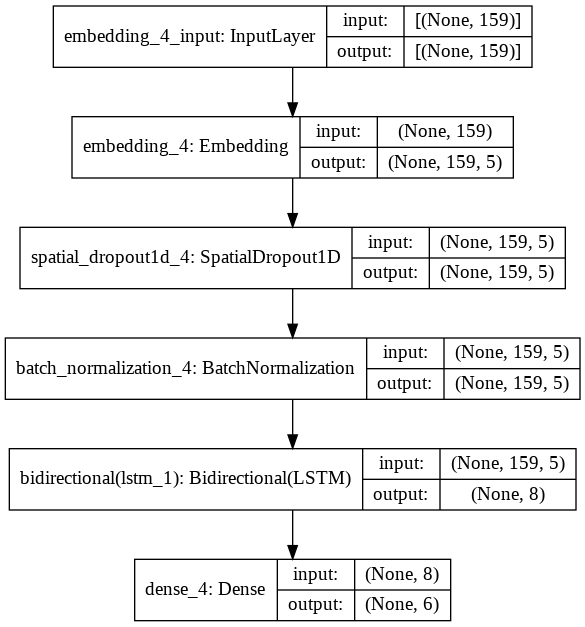

In [ ]:
# Создадим экземпляр модели нейронной сети
Bidirectional_Model = Create_Bidirectional_Model(5, maxLenData)
# и построим график для визуализации слоев и связей между ними
plot_model(Bidirectional_Model, to_file='Bidirectional_Model.png', show_shapes=True) 

In [ ]:
# Обучаем сеть с указанием обучающей выборки, количества эпох, размера минибатча для подачи сети, и размера валидационной выборки
history_Bidirectional_Model = Bidirectional_Model.fit(trainX_ForInput, trainY_OHE, epochs=100, batch_size=160, validation_split=0.2)

Epoch 1/100
140/140 [==============================] - 6s 22ms/step - loss: 1.5159 - accuracy: 0.4493 - val_loss: 1.4429 - val_accuracy: 0.4881
Epoch 2/100
140/140 [==============================] - 2s 18ms/step - loss: 1.3124 - accuracy: 0.4911 - val_loss: 1.3985 - val_accuracy: 0.4881
Epoch 3/100
140/140 [==============================] - 2s 18ms/step - loss: 1.1981 - accuracy: 0.5309 - val_loss: 1.4234 - val_accuracy: 0.4897
Epoch 4/100
140/140 [==============================] - 2s 18ms/step - loss: 1.1284 - accuracy: 0.5538 - val_loss: 1.2980 - val_accuracy: 0.5198
Epoch 5/100
140/140 [==============================] - 2s 17ms/step - loss: 1.0833 - accuracy: 0.5690 - val_loss: 1.1502 - val_accuracy: 0.5487
Epoch 6/100
140/140 [==============================] - 2s 17ms/step - loss: 1.0390 - accuracy: 0.5836 - val_loss: 1.1106 - val_accuracy: 0.5518
Epoch 7/100
140/140 [==============================] - 2s 17ms/step - loss: 1.0038 - accuracy: 0.5974 - val_loss: 1.0915 - val_accuracy:

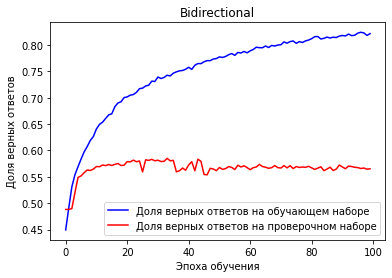

In [ ]:
Plot_train_history(history_Bidirectional_Model, 'Bidirectional')

In [ ]:
history_Bidirectional_Model = Bidirectional_Model.fit(trainX_ForInput, trainY_OHE, epochs=1000, batch_size=160, validation_split=0.2)

Epoch 1/1000
140/140 [==============================] - 2s 18ms/step - loss: 0.4182 - accuracy: 0.8483 - val_loss: 1.8776 - val_accuracy: 0.5684
Epoch 2/1000
140/140 [==============================] - 2s 17ms/step - loss: 0.4166 - accuracy: 0.8523 - val_loss: 1.9079 - val_accuracy: 0.5625
Epoch 3/1000
140/140 [==============================] - 2s 17ms/step - loss: 0.4197 - accuracy: 0.8502 - val_loss: 1.8864 - val_accuracy: 0.5693
Epoch 4/1000
140/140 [==============================] - 2s 17ms/step - loss: 0.4226 - accuracy: 0.8481 - val_loss: 1.9472 - val_accuracy: 0.5613
Epoch 5/1000
140/140 [==============================] - 2s 17ms/step - loss: 0.4137 - accuracy: 0.8507 - val_loss: 1.8917 - val_accuracy: 0.5647
Epoch 6/1000
140/140 [==============================] - 2s 17ms/step - loss: 0.4147 - accuracy: 0.8511 - val_loss: 1.9321 - val_accuracy: 0.5698
Epoch 7/1000
140/140 [==============================] - 2s 17ms/step - loss: 0.4090 - accuracy: 0.8522 - val_loss: 1.9359 - val_ac

In [ ]:
Show_predict_model(Bidirectional_Model, testX_ForInput, testY)

Средний процент распознавания  56.314615852422456 %
По классу крайне негативная: средний процент распознавания 46.28252788104089 %
По классу негативная: средний процент распознавания 28.47222222222222 %
По классу посредственная: средний процент распознавания 26.850258175559382 %
По классу положительная: средний процент распознавания 29.295774647887324 %
По классу восхитительная: средний процент распознавания 83.64264134656884 %


In [ ]:
Bidirectional_Model.save('/content/drive/My Drive/datasets/LSTM_Conv1D/Bidirectional_Model.h5') # сохраним модель по необходимости
# Bidirectional_Model = load_model('/content/drive/My Drive/datasets/LSTM_Conv1D/Bidirectional_Model.h5') # загрузим модель по необходимости

Conv1D

In [ ]:
def Create_Conv1D_Model(embeding_size, maxLenData, maxWordsCount = 10000):
    modelEC = Sequential() # создаём последовательную модель нейросети

    # преобразовываем каждое слово в многомерный вектор c указанием размерности вектора и длины входных данных
    modelEC.add(Embedding(maxWordsCount, embeding_size, input_length=maxLenData ))

    modelEC.add(SpatialDropout1D(0.2)) # добавляем слой регуляризации, "выключая" 1D карты объектов из эмбединг векторов, во избежание переобучения
    modelEC.add(BatchNormalization()) # добавляем слой нормализации данных
    modelEC.add(Conv1D(20, 5, activation="relu")) # добавляем одномерный сверточный слой, указывая кол-во фильтров и ширину окна для фильтров 
    modelEC.add(MaxPooling1D(2)) # добавляем слой подвыборки/пулинга с функцией максимума
    modelEC.add(Dropout(0.2)) # добавляем слой регуляризации, "выключая" указанное количество нейронов, во избежание переобучения
    modelEC.add(BatchNormalization()) # добавляем слой нормализации данных
    modelEC.add(Flatten()) # добавляем слой выравнивания/сглаживания ("сплющиваем" данные в вектор)
    modelEC.add(Dense(6, activation='softmax')) # добавляем полносвязный слой на 6 нейронов, с функцией активации softmax на выходном слое

    # Компиляция, составление модели с выбором алгоритма оптимизации, функции потерь и метрики точности
    modelEC.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
    return modelEC

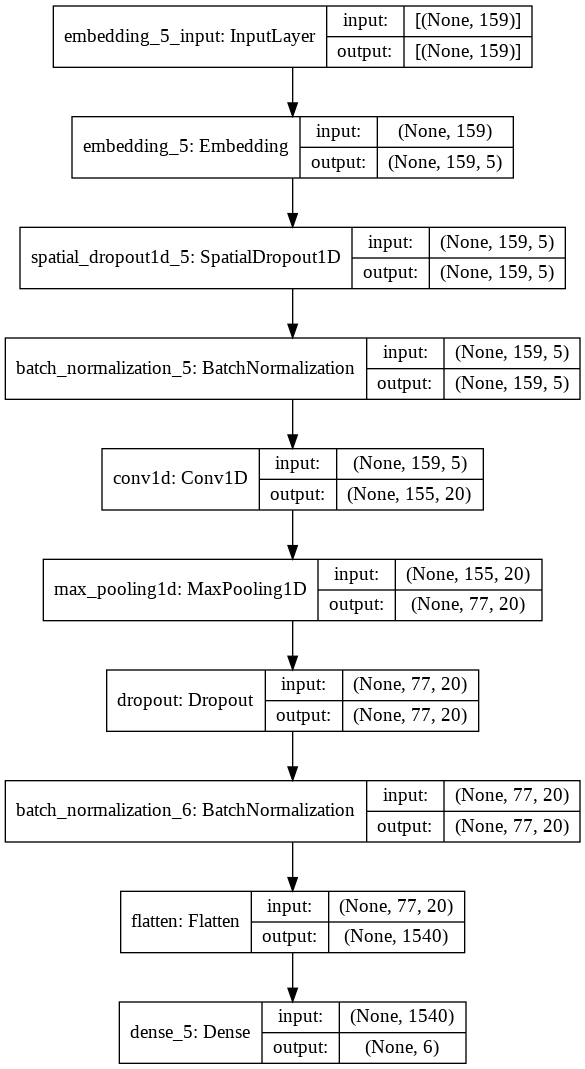

In [ ]:
# Создадим экземпляр модели нейронной сети
Conv1D_Model = Create_Conv1D_Model(5, maxLenData)
# и построим график для визуализации слоев и связей между ними
plot_model(Conv1D_Model, to_file='Conv1D_Model.png', show_shapes=True) 

In [ ]:
# Обучаем сеть с указанием обучающей выборки, количества эпох, размера минибатча для подачи сети, и размера валидационной выборки
history_Conv1D_Model = Conv1D_Model.fit(trainX_ForInput, trainY_OHE, epochs=100, batch_size=160, validation_split=0.2)

Epoch 1/100
140/140 [==============================] - 15s 8ms/step - loss: 1.6021 - accuracy: 0.4028 - val_loss: 1.4082 - val_accuracy: 0.4881
Epoch 2/100
140/140 [==============================] - 1s 6ms/step - loss: 1.2348 - accuracy: 0.5090 - val_loss: 1.3571 - val_accuracy: 0.4881
Epoch 3/100
140/140 [==============================] - 1s 6ms/step - loss: 1.0544 - accuracy: 0.5658 - val_loss: 1.3554 - val_accuracy: 0.4881
Epoch 4/100
140/140 [==============================] - 1s 6ms/step - loss: 0.9599 - accuracy: 0.6052 - val_loss: 1.2572 - val_accuracy: 0.5049
Epoch 5/100
140/140 [==============================] - 1s 6ms/step - loss: 0.8957 - accuracy: 0.6372 - val_loss: 1.0885 - val_accuracy: 0.5548
Epoch 6/100
140/140 [==============================] - 1s 6ms/step - loss: 0.8433 - accuracy: 0.6604 - val_loss: 1.0795 - val_accuracy: 0.5729
Epoch 7/100
140/140 [==============================] - 1s 6ms/step - loss: 0.8041 - accuracy: 0.6760 - val_loss: 1.1056 - val_accuracy: 0.579

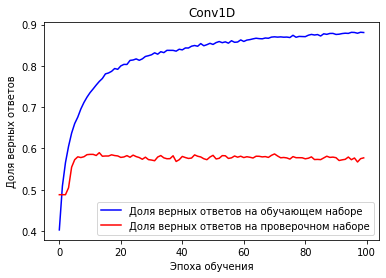

In [ ]:
Plot_train_history(history_Conv1D_Model, 'Conv1D')

In [ ]:
# Обучаем сеть с указанием обучающей выборки, количества эпох, размера минибатча для подачи сети, и размера валидационной выборки
history_Conv1D_Model = Conv1D_Model.fit(trainX_ForInput, trainY_OHE, epochs=1000, batch_size=160, validation_split=0.2)

Epoch 1/1000
140/140 [==============================] - 1s 6ms/step - loss: 0.3310 - accuracy: 0.8777 - val_loss: 1.7767 - val_accuracy: 0.5775
Epoch 2/1000
140/140 [==============================] - 1s 6ms/step - loss: 0.3163 - accuracy: 0.8831 - val_loss: 1.8155 - val_accuracy: 0.5804
Epoch 3/1000
140/140 [==============================] - 1s 6ms/step - loss: 0.3159 - accuracy: 0.8818 - val_loss: 1.7920 - val_accuracy: 0.5774
Epoch 4/1000
140/140 [==============================] - 1s 6ms/step - loss: 0.3121 - accuracy: 0.8859 - val_loss: 1.7974 - val_accuracy: 0.5795
Epoch 5/1000
140/140 [==============================] - 1s 6ms/step - loss: 0.3192 - accuracy: 0.8831 - val_loss: 1.7753 - val_accuracy: 0.5775
Epoch 6/1000
140/140 [==============================] - 1s 6ms/step - loss: 0.3202 - accuracy: 0.8796 - val_loss: 1.8096 - val_accuracy: 0.5781
Epoch 7/1000
140/140 [==============================] - 1s 6ms/step - loss: 0.3143 - accuracy: 0.8850 - val_loss: 1.8097 - val_accuracy:

In [ ]:
Show_predict_model(Conv1D_Model, testX_ForInput, testY)

Средний процент распознавания  57.125481451449424 %
По классу крайне негативная: средний процент распознавания 47.95539033457249 %
По классу негативная: средний процент распознавания 29.398148148148145 %
По классу посредственная: средний процент распознавания 28.57142857142857 %
По классу положительная: средний процент распознавания 30.7981220657277 %
По классу восхитительная: средний процент распознавания 83.68580060422961 %


In [ ]:
Conv1D_Model.save('/content/drive/My Drive/datasets/LSTM_Conv1D/Conv1D_Model.h5') # сохраним модель по необходимости
# Conv1D_Model = load_model('/content/drive/My Drive/datasets/LSTM_Conv1D/Conv1D_Model.h5') # загрузим модель по необходимости

In [ ]:
print(' Рейтинг моделей на данном конкретном примере, для анализа тональности текста. \n')
print('модель: SimpleRNN_Model     - Средний процент распознавания  46.96938982363673 %')
print('модель: LSTM_Model          - Средний процент распознавания  52.68599229677681 %')
print('модель: GRU_Model           - Средний процент распознавания  55.402392053517126 %')
print('модель: Bidirectional_Model - Средний процент распознавания  56.314615852422456 %')
print('модель: Conv1D_Model        - Средний процент распознавания  57.125481451449424 %')

 Рейтинг моделей на данном конкретном примере, для анализа тональности текста. 

модель: SimpleRNN_Model     - Средний процент распознавания  46.96938982363673 %
модель: LSTM_Model          - Средний процент распознавания  52.68599229677681 %
модель: GRU_Model           - Средний процент распознавания  55.402392053517126 %
модель: Bidirectional_Model - Средний процент распознавания  56.314615852422456 %
модель: Conv1D_Model        - Средний процент распознавания  57.125481451449424 %


##Литература
1. Рекуррентные нейронные сети. Кустикова Валентина,
к.т.н., ст.преп. каф. МОСТ ИИТММ,
ННГУ им. Н.И. Лобачевского. http://hpc-education.unn.ru/files/courses/intel-neon-course/Rus/Lectures/Presentations/7_RNN.pdf
2. Рекуррентные нейронные сети. Сергей Николенко, НИУ ВШЭ − Санкт-Петербург
19 октября 2019 г. https://logic.pdmi.ras.ru/~sergey/teaching/mlhse19/17-rnn.pdf
3. Применение сверточных нейронных сетей для задач NLP. https://habr.com/ru/company/ods/blog/353060/
4. Анализ тональности текстов с помощью сврточных нейронных сетей. https://habr.com/ru/company/mailru/blog/417767/
5. Анализ текстов нейронными сетями. Bag Of Words vs. Embedding. https://www.bizkit.ru/2020/05/20/17344/


